## ```NoteBook Focus```
---
1. More modeling to figure out why the UNbalanced classes model is performing so well.

2. 

## ```Imports```
---

In [1]:
import pandas as pd
from classifiers_copy import classify
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## ```Modeling after EDA1```
---
1. I'm going to try a model on UNbalanced classes with less features to see how the model performs. I'm expecting for they're to be a drop in performance.

In [2]:
drugs = pd.read_csv('../Claire/data/drugs_2020_simply_imputed.csv')
drugs.head()

,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typemony,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,1.0,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0
1,1.0,64.0,0,0,1.0,211.0,1.0,1.0,1,51,...,1.0,0,1.0,1.193400e+06,5967.000000,3.0,27.0,108.0,87.0,0.0
2,1.0,28.0,0,0,1.0,211.0,3.0,1.0,1,48,...,1.0,0,2.0,2.000000e+06,2000.000000,6.0,27.0,162.0,130.0,2.0
3,2.0,55.0,0,0,1.0,211.0,77.0,1.0,1,65,...,1.0,0,1.0,1.030000e+04,4.120000,5.0,13.0,37.0,30.0,0.0
4,1.0,30.0,0,0,1.0,211.0,6.0,1.0,1,87,...,1.0,0,1.0,1.692000e+05,84.600000,6.0,25.0,137.0,110.0,2.0


In [3]:
drugs['prisdum'].value_counts(normalize=True)

# 0 = no prison time
# 1 = prison time

1    0.955196
0    0.044804
Name: prisdum, dtype: float64

In [ ]:
drugs.drop(columns=)

In [4]:
drugs.columns

Index(['accgdln', 'age', 'altdum', 'amttotal', 'casetype', 'citwhere',
       'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
       'educatn', 'intdum', 'methmin', 'monrace', 'monsex', 'mweight',
       'newcit', 'newcnvtn', 'neweduc', 'newrace', 'nodrug', 'numdepen',
       'offguide', 'prisdum', 'probatn', 'probdum', 'quarter', 'reas1',
       'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
       'safety', 'senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1',
       'sources', 'statmax', 'statmin', 'supermax', 'supermin', 'suprdum',
       'suprel', 'timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
       'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor',
       'xminsor', 'sentrnge'],
      dtype='object')

In [9]:
# model with UN_balanced classes

#set up X/y
X = drugs[['age','drugmin','educatn','neweduc','quarter','sources',
           'statmax', 'statmin', 'supermax', 'supermin','suprel',
           'timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
           'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
           'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor'
          ]]
y = drugs['prisdum']

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.7, stratify=y)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

# train multiple models
unbalanced_class_scores = classify(X_train_ss,X_test_ss,y_train,y_test)

In [10]:
unbalanced_class_scores

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.979881,0.972866,0.007015,0.989543,0.985942,0.003602,0.982564,0.976026,0.006538,0.996623,0.996061,0.000562
logreg,0.989049,0.979600,0.009449,0.994268,0.989413,0.004855,0.994136,0.981044,0.013092,0.994401,0.997927,0.003526
dt,1.000000,0.955239,0.044761,1.000000,0.977084,0.022916,1.000000,0.956142,0.043858,1.000000,0.998963,0.001037
bag,0.998472,0.955041,0.043431,0.999200,0.977003,0.022197,0.999555,0.955230,0.044326,0.998845,0.999793,0.000948
bag_knn,0.979881,0.971083,0.008798,0.989542,0.985016,0.004526,0.982648,0.975208,0.007440,0.996534,0.995024,0.001510
bag_log,0.989389,0.978015,0.011373,0.994447,0.988603,0.005844,0.994226,0.979251,0.014974,0.994668,0.998134,0.003466
rf,1.000000,0.955239,0.044761,1.000000,0.977107,0.022893,1.000000,0.955239,0.044761,1.000000,1.000000,0.000000
et,1.000000,0.967122,0.032878,1.000000,0.983075,0.016925,1.000000,0.967101,0.032899,1.000000,0.999585,0.000415
ada,0.990832,0.955239,0.035593,0.995199,0.977107,0.018092,0.995641,0.955239,0.040403,0.994756,1.000000,0.005244
gboost,0.994482,0.955239,0.039244,0.997113,0.977107,0.020006,0.996714,0.955239,0.041476,0.997512,1.000000,0.002488


train acc: 0.9890492359932088
test acc: 0.9795999207763914


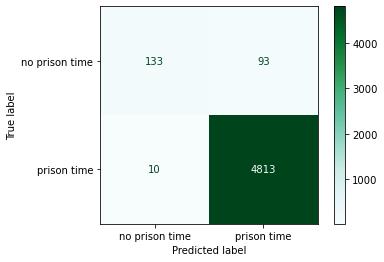

In [11]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate, train, evaluate
logreg = LogisticRegression()
logreg.fit(X_train_ss,y_train)
print(f"train acc: {logreg.score(X_train_ss,y_train)}")
print(f"test acc: {logreg.score(X_test_ss,y_test)}")

# create df to visualize coefs
logreg_scores = pd.DataFrame(columns=X.columns,data=logreg.coef_).T

# set up confusion matrix
cm = confusion_matrix(y_test,logreg.predict(X_test_ss))

# plot matrix
plot_confusion_matrix(logreg, X_test_ss, y_test, cmap='BuGn', display_labels=['no prison time', 'prison time']);

**The model is performing well like we expected, misclassifying the minority class with frequency. More EDA and going through the data dictionary are my next steps in EDA2.**

In [ ]:
demographic_columns=['age','newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn', 'educatn']